## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
df = pd.read_csv('dataset\evnts_clean.csv')

In [3]:
df.head(3)

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1


In [4]:
df.shape

(54023, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54023 entries, 0 to 54022
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            54023 non-null  object 
 1   event_id           54023 non-null  object 
 2   organization_id    54023 non-null  object 
 3   transaction_date   54023 non-null  object 
 4   event_type         54023 non-null  object 
 5   organization_type  54023 non-null  object 
 6   event_category     54023 non-null  object 
 7   user_type          54023 non-null  object 
 8   user_location      54023 non-null  object 
 9   event_location     54023 non-null  object 
 10  gender             54023 non-null  object 
 11  age_when_register  54023 non-null  int64  
 12  price              54023 non-null  float64
 13  total_ticket_sold  54023 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 5.8+ MB


In [6]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,user_id,object,0,0.0,32171,[ecbc209c974937f6c66a729d75b3f5d15b7e91032ba8e...
1,event_id,object,0,0.0,811,[8b855cbc9796e78dfbc8ec7eb938dc95bb9ff8a2c573e...
2,organization_id,object,0,0.0,274,[82ae7d8f032587ee2cd1f43ef733b1176d02aa13dc713...
3,transaction_date,object,0,0.0,49299,[2019-01-02 08:55:21]
4,event_type,object,0,0.0,1,[Event]
5,organization_type,object,0,0.0,7,[Community]
6,event_category,object,0,0.0,296,[Webinar - Charity - Education]
7,user_type,object,0,0.0,2,[Guest]
8,user_location,object,0,0.0,38,[Kai & Aru]
9,event_location,object,0,0.0,23,[Palembang]


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_when_register,54023.0,22.534883,5.343978,18.0,21.0,21.0,21.0,63.0
price,54023.0,82542.244137,310627.372425,0.0,0.0,0.0,70000.0,8100000.0
total_ticket_sold,54023.0,1.623623,2.734707,1.0,1.0,1.0,1.0,134.0


In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
user_id,54023,32171,74b15dc9dd3a61432731b8edd5588b6cb35ac12ba720d9...,804
event_id,54023,811,9441a919384943d46915a2efaaad637bb0ca08cf0de0d9...,4397
organization_id,54023,274,1af57e2c0b4cd813117b114b25c36938b219e172830653...,4413
transaction_date,54023,49299,2020-05-20 04:39:54,31
event_type,54023,1,Event,54023
organization_type,54023,7,Event Organizer and Promotor,26748
event_category,54023,296,Webinar,5619
user_type,54023,2,Guest,30907
user_location,54023,38,Jakarta,21089
event_location,54023,23,Jakarta,25342


In [9]:
df['user_type'].value_counts()

Guest         30907
Registered    23116
Name: user_type, dtype: int64

## EDA

> We will start this process by dividing the numerical and categorical features. Then we explore the data within the designated features. Then in the next part, we will further explore the registered and guest users, so that we may find the pattern between those two. But before that, I'll fix the datetime first.

In [10]:
# Fixing datetime object

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

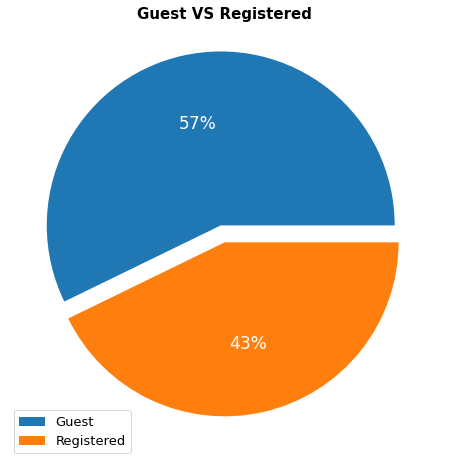

In [11]:
plt.figure(figsize = (12, 8))
plt.title('Guest VS Registered', size = 15, fontweight = 'bold')

labels = 'Guest', 'Registered'

plt.pie(df['user_type'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode=(0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)
plt.show()

In [12]:
df['user_type'].value_counts()

Guest         30907
Registered    23116
Name: user_type, dtype: int64

In [13]:
# Split categorical & numerical

df_cat = df.select_dtypes(['object'])
df_con = df.select_dtypes(['int64', 'float64'])

### NUMERICAL FEATURES

In [14]:
df_con.head()

,age_when_register,price,total_ticket_sold
0,28,75000.0,2
1,29,100000.0,1
2,29,100000.0,1
3,28,75000.0,6
4,28,75000.0,2


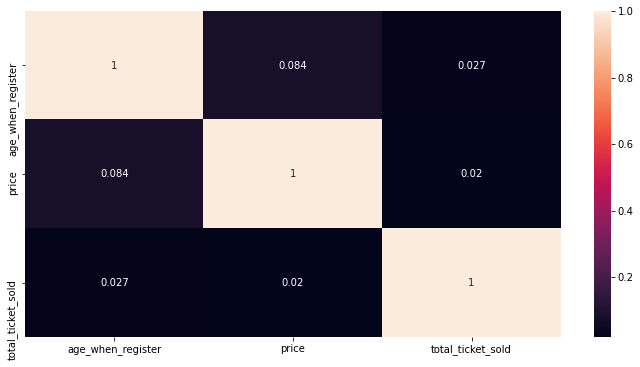

In [15]:
plt.figure(figsize = (12,6))
sns.heatmap(df_con.corr(), annot=True)
plt.show()

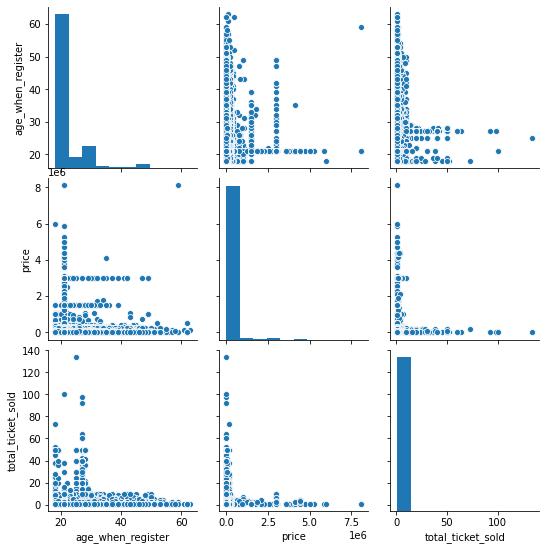

In [16]:
sns.pairplot(df_con)

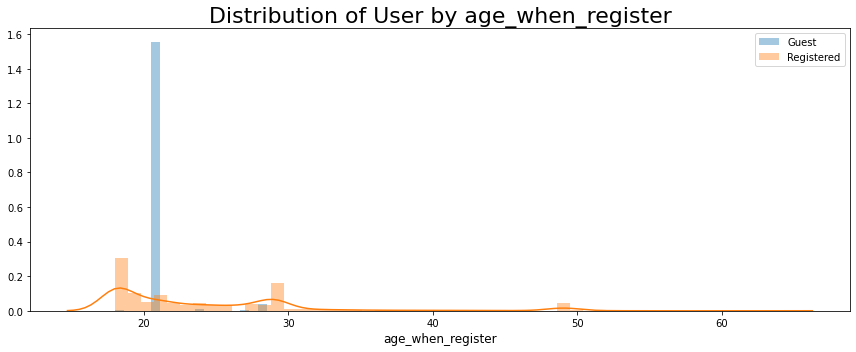

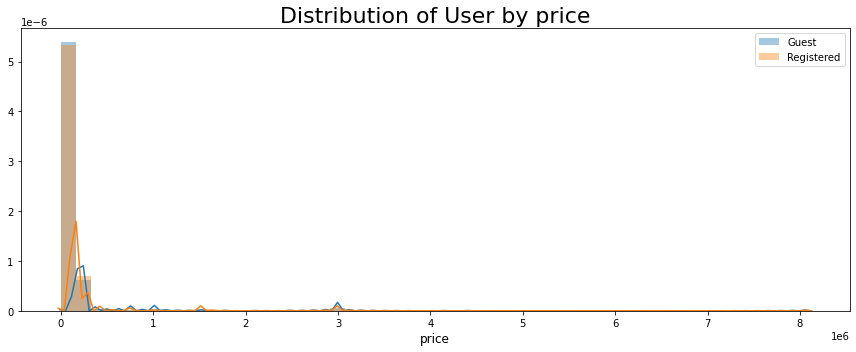

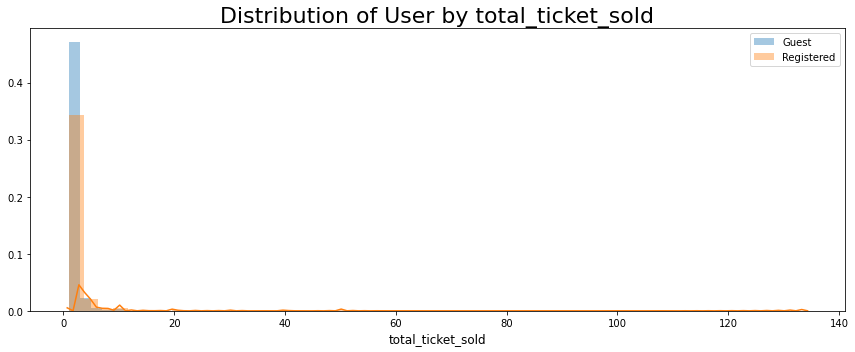

In [17]:
for i in df_con :
    plt.figure(figsize = (12,5))
    ax = sns.distplot(df[(df['user_type'] == 'Guest')][i])
    ax = sns.distplot(df[(df['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [18]:
guest_con = df_con[df['user_type']=='Guest']
regist_con = df_con[df['user_type']=='Registered']

In [19]:
guest_con['age_when_register'].value_counts().head()

21    29807
28      777
24      189
18       67
27       59
Name: age_when_register, dtype: int64

In [20]:
regist_con['age_when_register'].value_counts().head()

18    6404
29    3386
19    2196
21    1943
20    1094
Name: age_when_register, dtype: int64

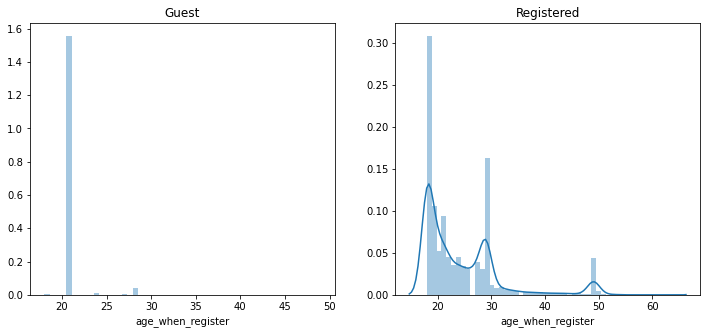

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['age_when_register'], ax=ax1)
sns.distplot(regist_con['age_when_register'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

In [22]:
guest_con['price'].value_counts().head()

0.0         20808
50000.0      1693
250000.0      807
232000.0      701
175000.0      682
Name: price, dtype: int64

In [23]:
regist_con['price'].value_counts().head()

0.0         7660
30000.0     2499
50000.0     2080
175000.0    1710
75000.0     1020
Name: price, dtype: int64

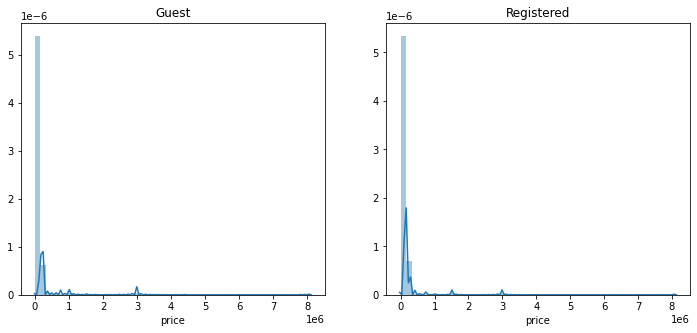

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['price'], ax=ax1)
sns.distplot(regist_con['price'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

In [25]:
guest_con['total_ticket_sold'].value_counts().head()

1    25492
2     3366
3      775
4      633
5      204
Name: total_ticket_sold, dtype: int64

In [26]:
regist_con['total_ticket_sold'].value_counts().head()

1    15783
2     4236
3     1095
4      731
5      391
Name: total_ticket_sold, dtype: int64

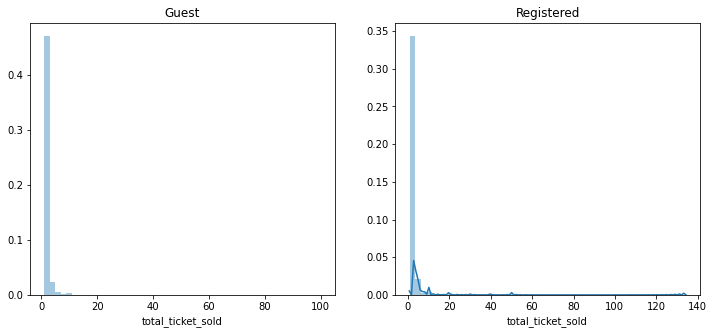

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['total_ticket_sold'], ax=ax1)
sns.distplot(regist_con['total_ticket_sold'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

### CATEGORICAL FEATURES

In [28]:
df_cat.head()

,user_id,event_id,organization_id,event_type,organization_type,event_category,user_type,user_location,event_location,gender
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none


In [29]:
cat_corr = df_cat.drop(columns = ['user_id', 'event_id', 'organization_id', 'event_type'])

In [30]:
cat_corr

,organization_type,event_category,user_type,user_location,event_location,gender
0,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none
1,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female
2,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female
3,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none
4,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none
...,...,...,...,...,...,...
54018,Event Organizer and Promotor,Webinar,Guest,Unknown,Indonesia,none
54019,Event Organizer and Promotor,Webinar - Education - Networking - Seminar,Registered,Unknown,Makassar,male
54020,Event Organizer and Promotor,Webinar,Guest,Unknown,Indonesia,none
54021,Event Organizer and Promotor,Webinar - Education,Guest,Unknown,Indonesia,none


In [31]:
# cramers for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [32]:
corr = []
for i in cat_corr:
    matrix = []
    for j in cat_corr:
        matrix.append(cramersv(cat_corr[i], cat_corr[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = cat_corr.columns, columns = cat_corr.columns)

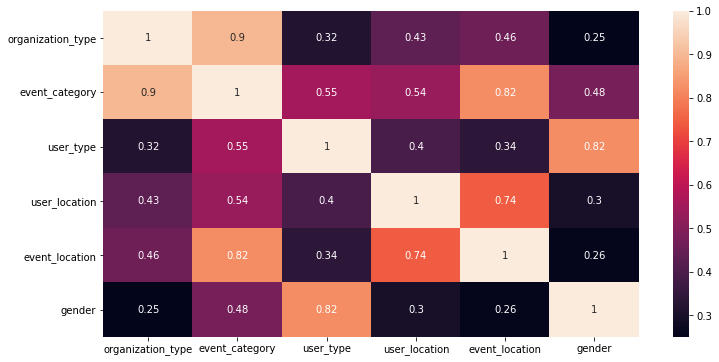

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(corr_cat, annot = True)
plt.show()

> There are several features that highly correlated. We will explore it one by one.

In [34]:
pd.crosstab(df['user_type'], df['gender'], normalize = True)

gender,female,male,none
user_type,,,
Guest,0.036873,0.040076,0.495159
Registered,0.271699,0.140607,0.015586


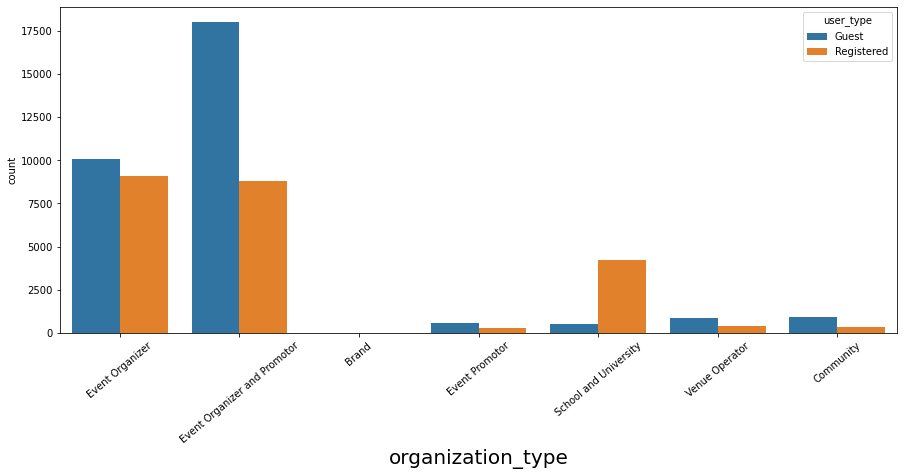

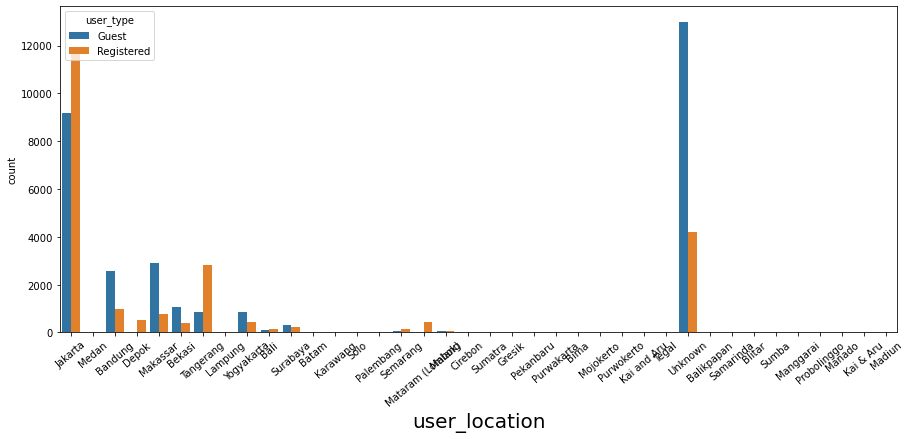

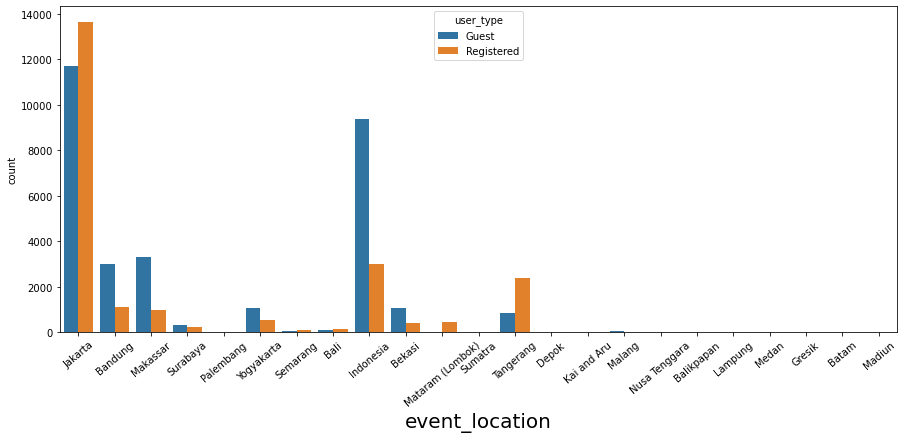

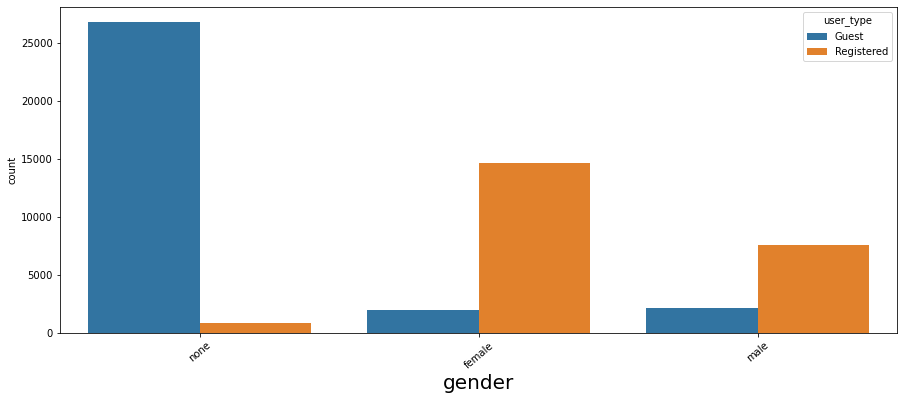

In [35]:
for i in cat_corr.drop(columns = ['event_category', 'user_type']):
    plt.figure(figsize = (15,6))
    ax = sns.countplot(x = i, data = cat_corr, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=40)
    plt.tight_layout
    plt.show()

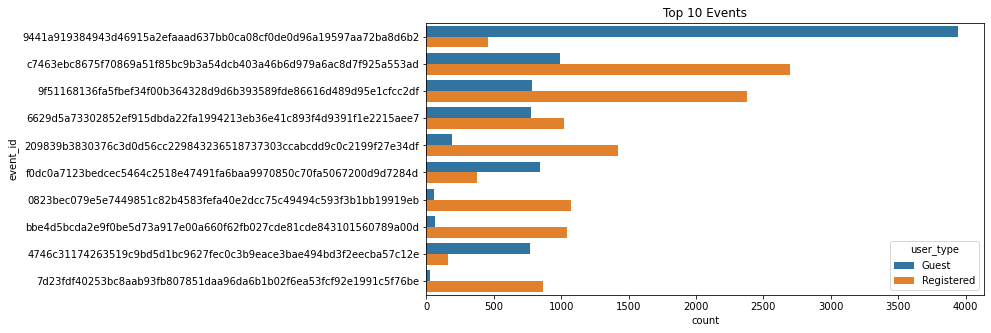

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'event_id', hue = 'user_type', data = df_cat, order = df_cat['event_id'].value_counts().head(10).index)
plt.title('Top 10 Events')
plt.show()

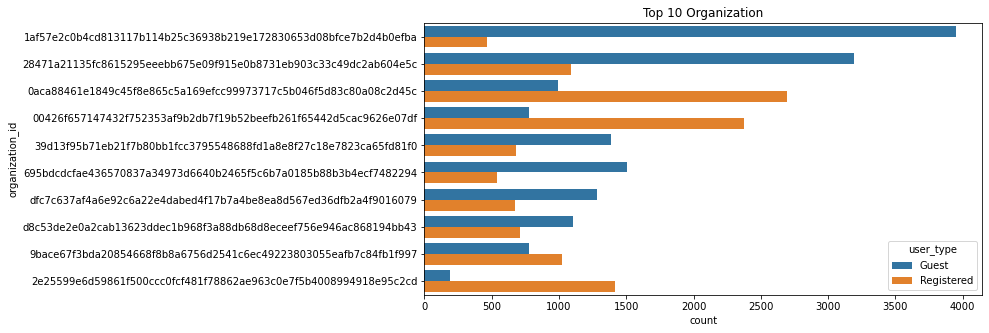

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'organization_id', hue = 'user_type', data = df_cat, order = df_cat['organization_id'].value_counts().head(10).index)
plt.title('Top 10 Organization')
plt.show()

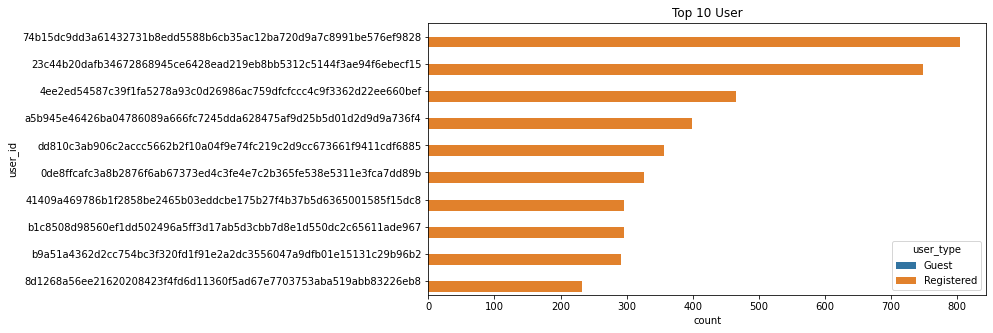

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'user_id', hue = 'user_type', data = df_cat, order = df_cat['user_id'].value_counts().head(10).index)
plt.title('Top 10 User')
plt.show()

### FREE VS PAID USER

In [114]:
free = df[df['price'] <=1]
paid = df[df['price'] >1]

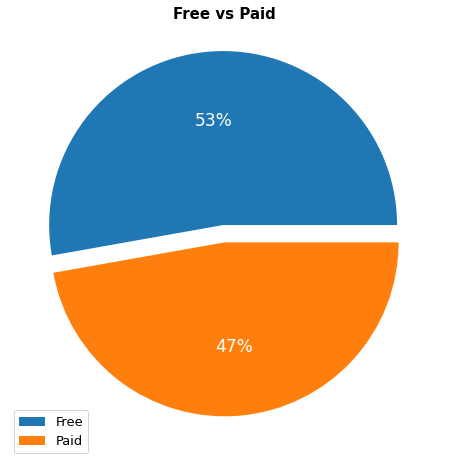

In [115]:
# Free user

plt.figure(figsize = (12, 8))
plt.title('Free vs Paid', size = 15, fontweight = 'bold')

labels = 'Free', 'Paid'

plt.pie([len(free), len(paid)], autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode=(0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)
plt.show()

In [116]:
print(f'Free User : {len(free)}\nPaid User : {len(paid)}')

Free User : 28523
Paid User : 25500


In [117]:
free['user_type'].value_counts()

Guest         20808
Registered     7715
Name: user_type, dtype: int64

In [118]:
paid['user_type'].value_counts()

Registered    15401
Guest         10099
Name: user_type, dtype: int64

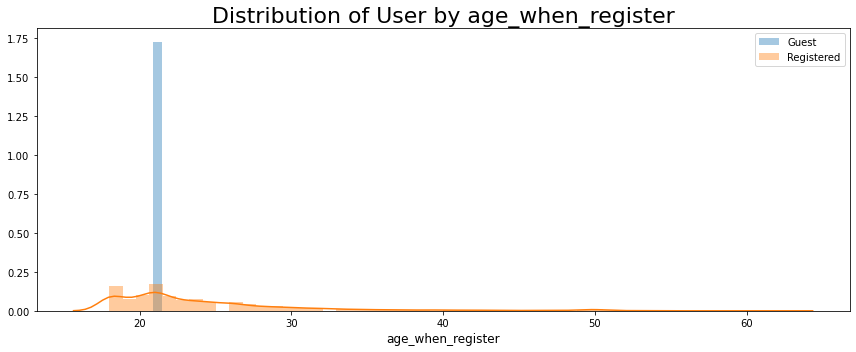

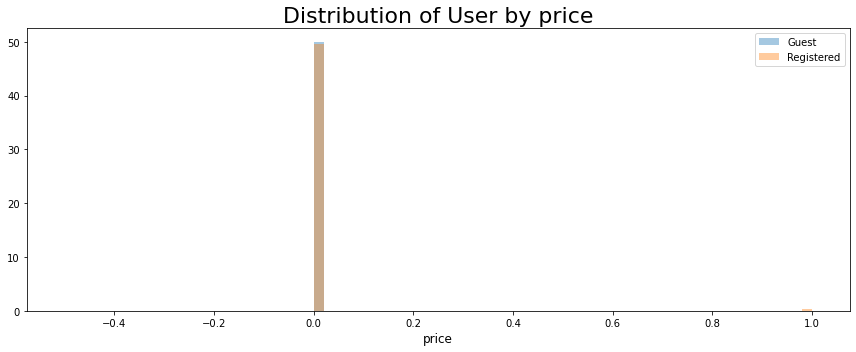

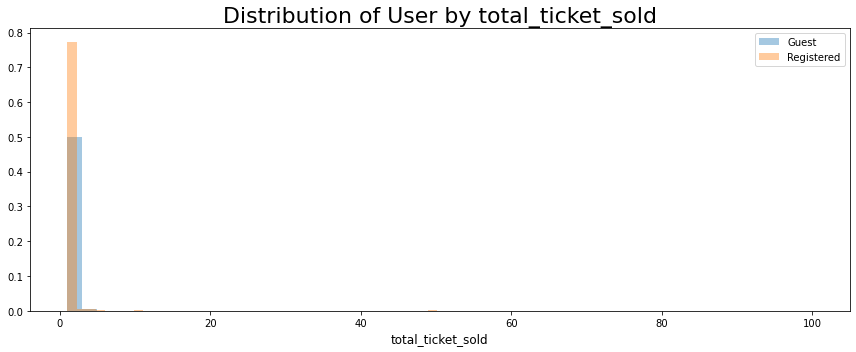

In [44]:
# Free user

for i in free.select_dtypes(['float64', 'int64']) :
    plt.figure(figsize = (12,5))
    ax = sns.distplot(free[(free['user_type'] == 'Guest')][i])
    ax = sns.distplot(free[(free['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [45]:
free['total_ticket_sold'].value_counts()

1      27020
2       1047
3        166
4        141
5         49
10        39
7         12
6         11
50         9
8          5
20         2
9          2
25         2
32         2
14         2
17         1
64         1
19         1
21         1
52         1
100        1
45         1
23         1
39         1
40         1
12         1
28         1
13         1
16         1
Name: total_ticket_sold, dtype: int64

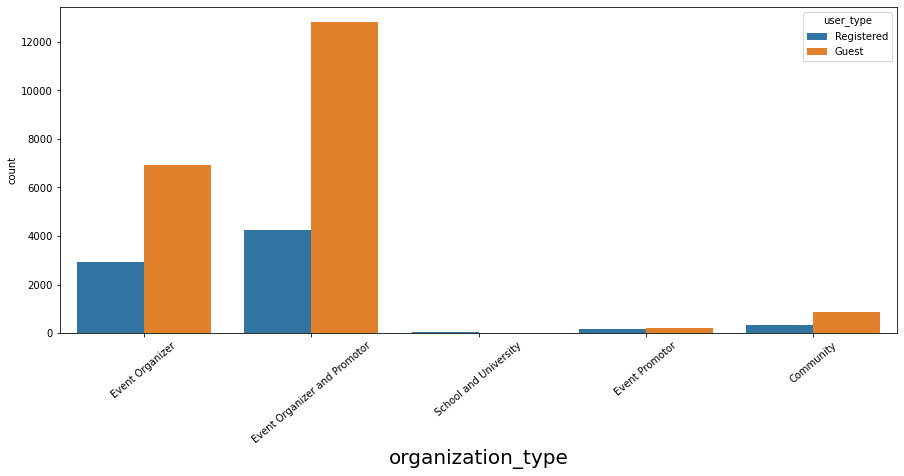

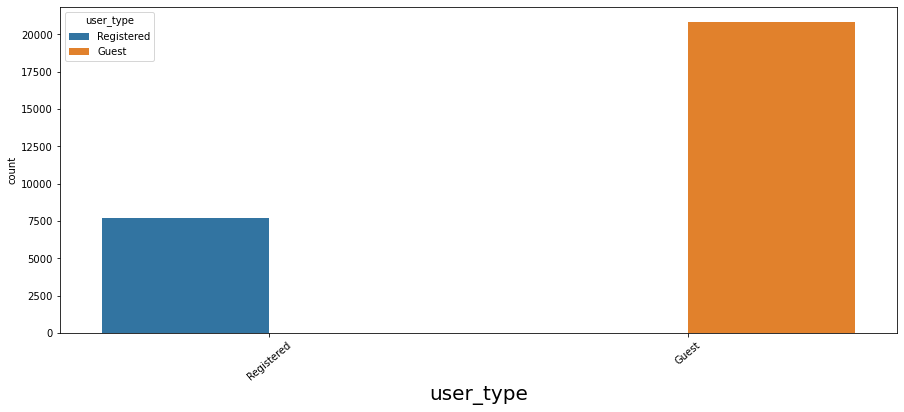

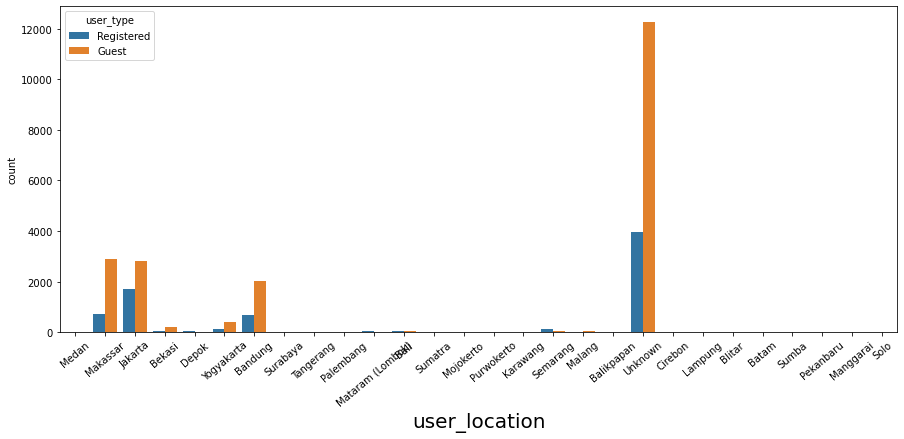

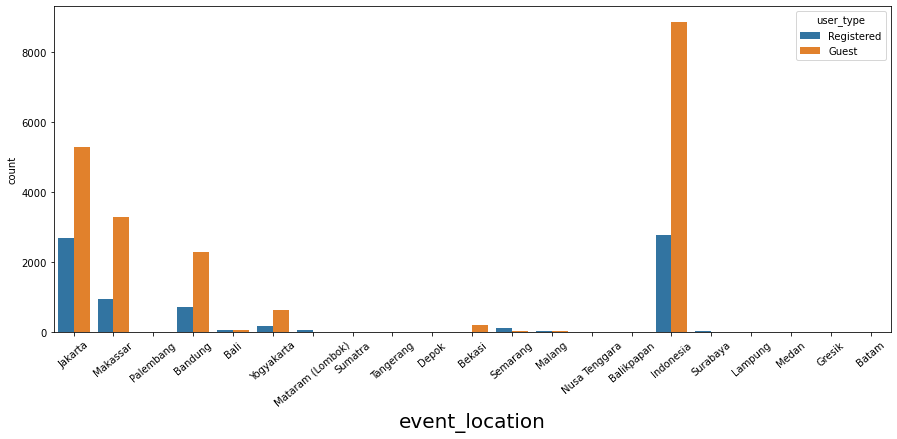

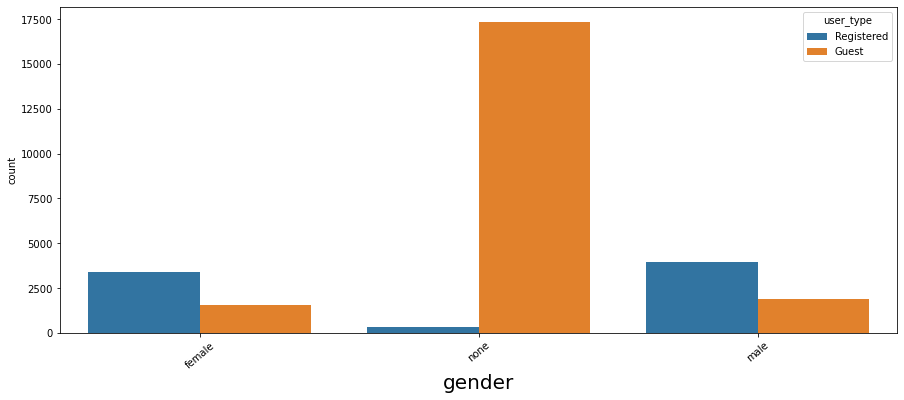

In [46]:
# Free user

for i in free[['organization_type', 'user_type', 'user_location', 'event_location', 'gender']]:
    plt.figure(figsize = (15,6))
    ax = sns.countplot(x = i, data = free, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=40)
    plt.tight_layout
    plt.show()

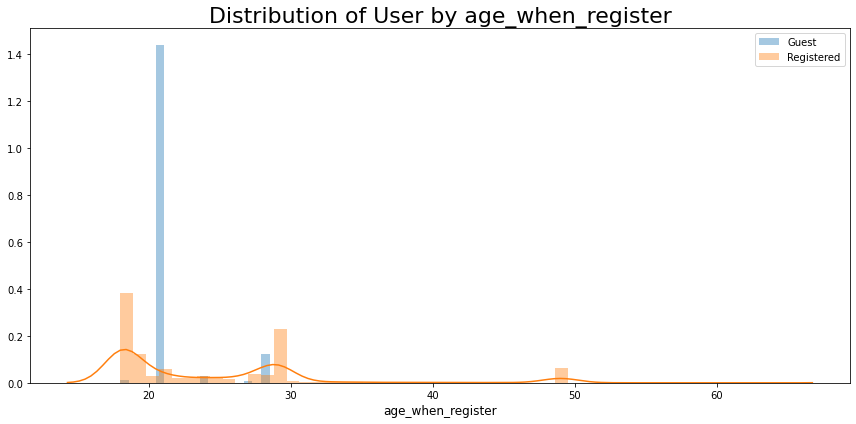

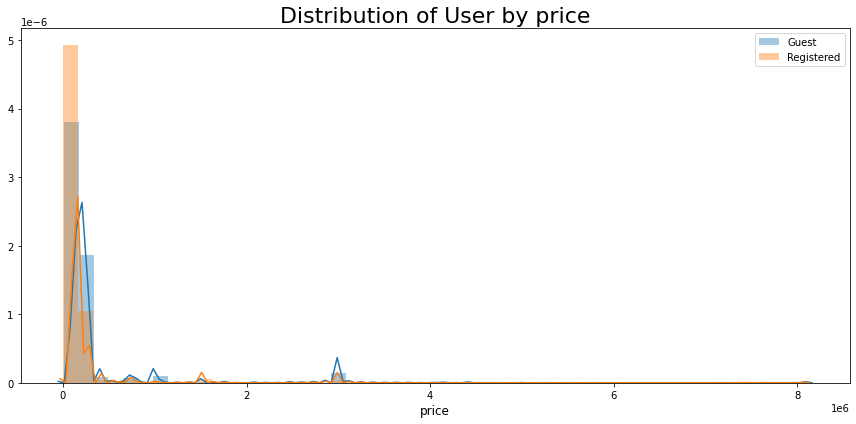

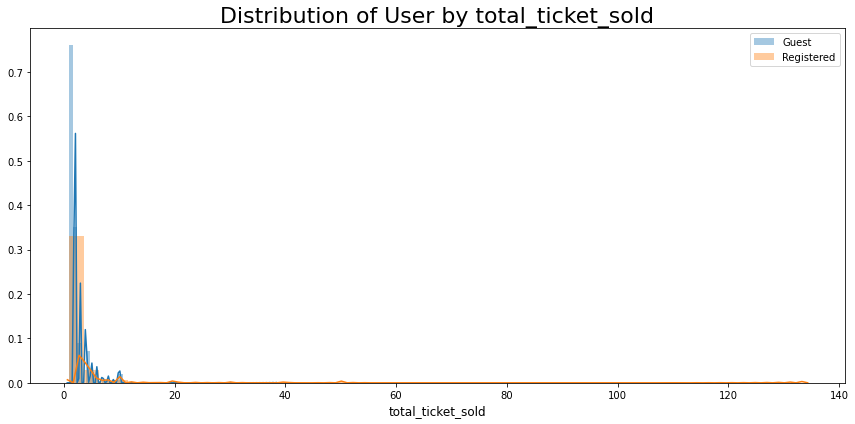

In [47]:
# Paid user

for i in paid.select_dtypes(['float64', 'int64']) :
    plt.figure(figsize = (12,6))
    ax = sns.distplot(paid[(paid['user_type'] == 'Guest')][i])
    ax = sns.distplot(paid[(paid['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [48]:
paid['price'].value_counts()

50000.0      3773
30000.0      3149
175000.0     2392
75000.0      1458
250000.0     1165
             ... 
5852000.0       1
632500.0        1
38000.0         1
1525000.0       1
1800000.0       1
Name: price, Length: 117, dtype: int64

In [49]:
paid['total_ticket_sold'].value_counts()

1      14255
2       6555
3       1704
4       1223
5        546
10       324
6        277
7        150
8        136
20        79
9         67
50        46
40        31
30        20
14        11
24        10
15         9
12         9
11         8
16         7
18         4
17         3
26         3
36         3
32         2
60         2
28         2
25         2
38         2
41         1
42         1
98         1
21         1
22         1
49         1
134        1
92         1
73         1
27         1
Name: total_ticket_sold, dtype: int64

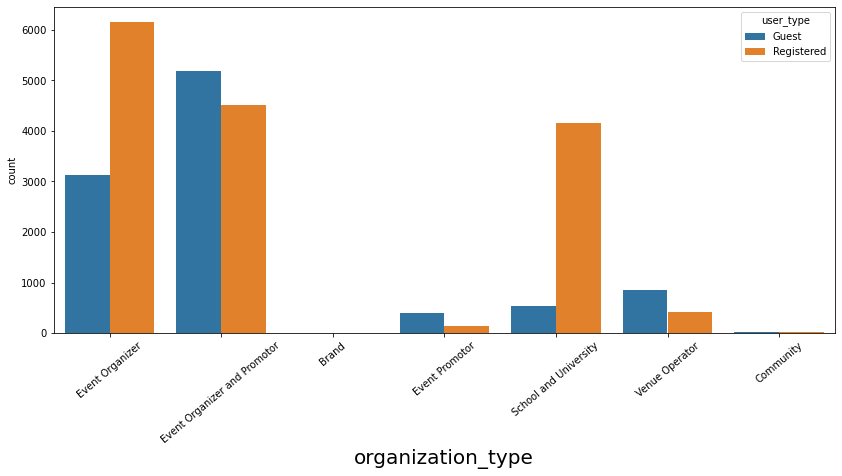

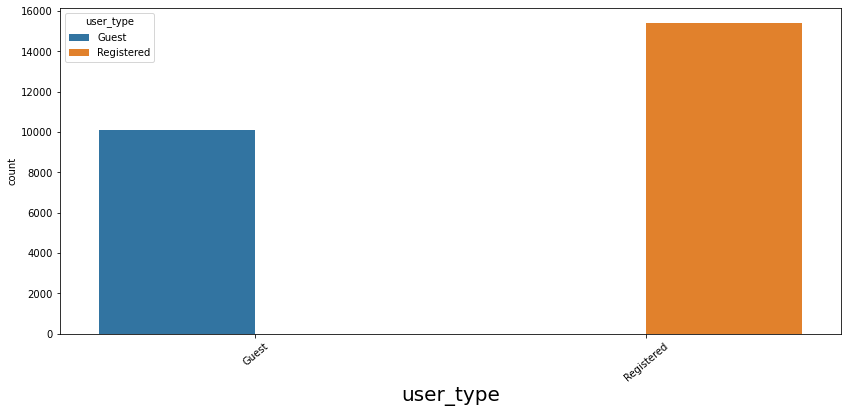

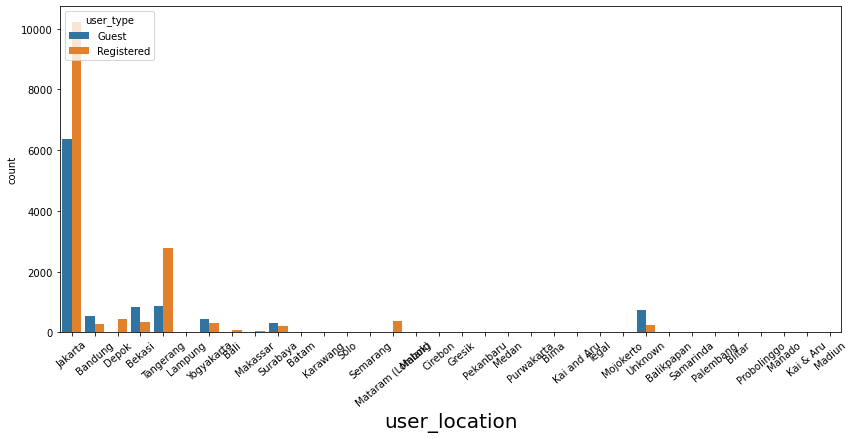

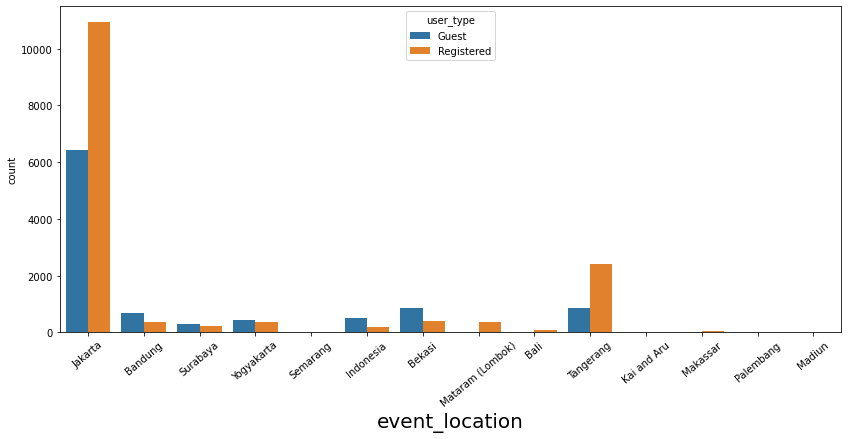

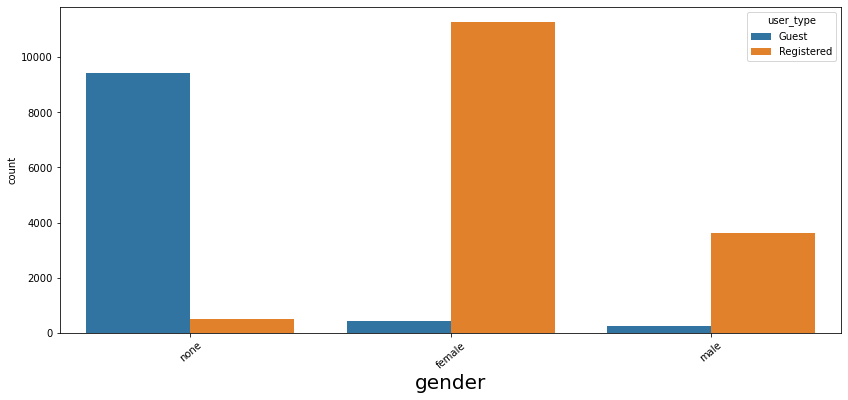

In [50]:
# Paid user

for i in paid[['organization_type', 'user_type', 'user_location', 'event_location', 'gender']]:
    plt.figure(figsize = (14,6))
    ax = sns.countplot(x = i, data = paid, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=40)
    plt.tight_layout
    plt.show()

### EVENT CATEGORY THAT GAINED MORE REVENUE

In [51]:
paid.groupby('price')['event_category'].value_counts().tail()

price      event_category                              
5000000.0  Conference                                      2
5250000.0  Conference                                      1
5852000.0  Seminar                                         1
6000000.0  Workshop - Business                             1
8100000.0  Tech Startup - Group Activities - Conference    7
Name: event_category, dtype: int64

In [52]:
amount = []
for i, j in zip(paid['price'], paid['total_ticket_sold']):
    amount.append(i * j)

In [53]:
paid['total_paid'] = amount

In [54]:
profit = []
for i, j in zip(paid['price'], paid['total_ticket_sold']):
    if i >= 60000:
        profit.append((i * 5/100) * j)
    else :
        profit.append(3000 * j)

In [55]:
# Creating profit features

paid['profit'] = profit

In [56]:
paid.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold,total_paid,profit
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1,100000.0,5000.0
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6,450000.0,22500.0
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2,150000.0,7500.0


In [57]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25500 entries, 0 to 54020
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            25500 non-null  object        
 1   event_id           25500 non-null  object        
 2   organization_id    25500 non-null  object        
 3   transaction_date   25500 non-null  datetime64[ns]
 4   event_type         25500 non-null  object        
 5   organization_type  25500 non-null  object        
 6   event_category     25500 non-null  object        
 7   user_type          25500 non-null  object        
 8   user_location      25500 non-null  object        
 9   event_location     25500 non-null  object        
 10  gender             25500 non-null  object        
 11  age_when_register  25500 non-null  int64         
 12  price              25500 non-null  float64       
 13  total_ticket_sold  25500 non-null  int64         
 14  total_

In [58]:
paid.groupby('event_category')['total_paid'].value_counts().sort_values().head()

event_category                            total_paid
Workshop - Travel - Seminar - Conference  3625000.0     1
Music - Festival                          500000.0      1
                                          110000.0      1
                                          100000.0      1
                                          50000.0       1
Name: total_paid, dtype: int64

In [59]:
rev_evnt = paid.groupby(by='event_category', as_index=False)['profit'].sum().sort_values(by = 'event_category',ascending=False)
rev_evnt.columns = ['event_category','sum_of_profit']

In [60]:
rev_evnt.sort_values(by='sum_of_profit', ascending=False).head()

,event_category,sum_of_profit
60,Networking - Conference,89990000.0
50,Music - Highschool Student - Concert - Pensi,75578500.0
103,Travel - Group Activities - Water Park,65329000.0
48,Music - Food - Fashion - Festival,25296000.0
0,Art Exhibition - Family - Art - Exhibition - G...,16172000.0


In [61]:
paid[paid['event_category']=='Networking - Conference']['price'].value_counts()

3000000.0    353
1000000.0    169
1800000.0      1
Name: price, dtype: int64

### LOCATION WITH THE MOST EVENT

In [62]:
jkt = df[df['event_location']=='Jakarta']

In [63]:
jkt.head()

,user_id,event_id,organization_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,event_location,gender,age_when_register,price,total_ticket_sold
0,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:04:32,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2
1,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:44,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:11:50,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Registered,Jakarta,Jakarta,female,29,100000.0,1
3,b1fc4cf5297d6639937d7806cf8ff626e4fdef6548c892...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:24:59,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,6
4,1da4ae70dde95b9d83c7586d1af62599cb01c4fc660f63...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,9bace67f3bda20854668f8b8a6756d2541c6ec49223803...,2019-01-01 03:53:11,Event,Event Organizer,Art Exhibition - Family - Art - Exhibition - G...,Guest,Jakarta,Jakarta,none,28,75000.0,2


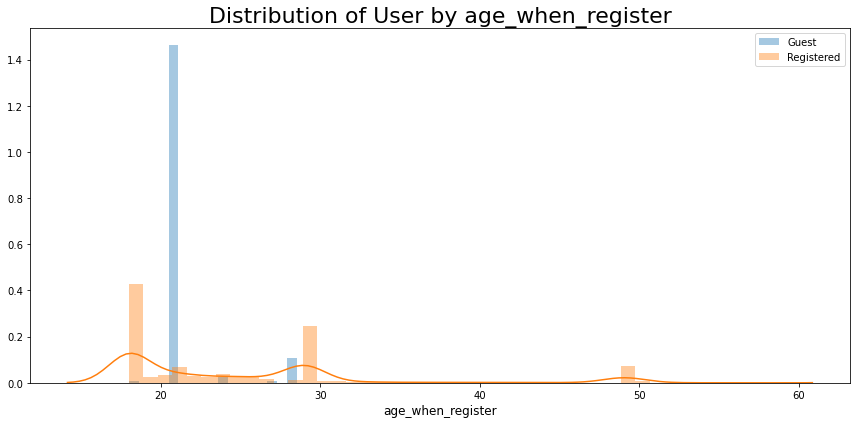

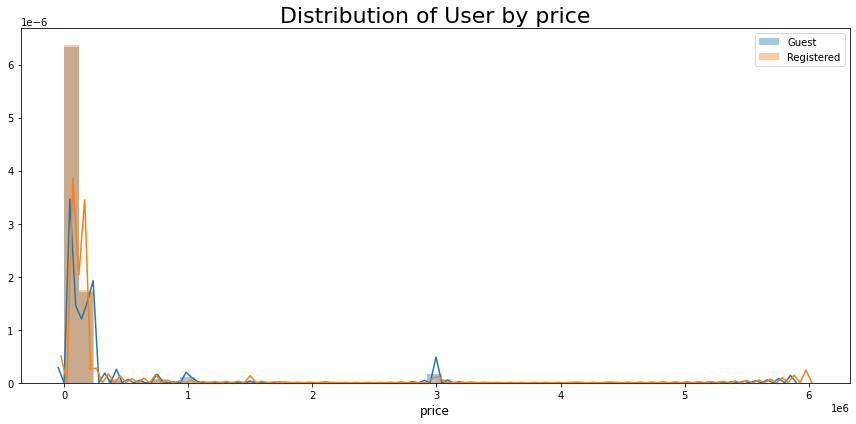

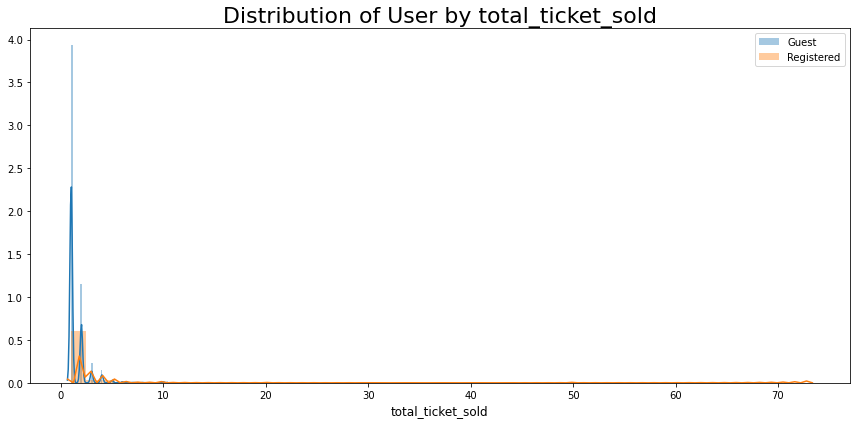

In [64]:
for i in jkt.select_dtypes(['float64', 'int64']) :
    plt.figure(figsize = (12,6))
    ax = sns.distplot(jkt[(jkt['user_type'] == 'Guest')][i])
    ax = sns.distplot(jkt[(jkt['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [65]:
jkt.groupby('user_type')['age_when_register'].value_counts()

user_type   age_when_register
Guest       21                   10604
            28                     777
            24                     189
            18                      65
            27                      58
            47                       3
            19                       2
            49                       2
            26                       1
Registered  18                    5272
            29                    3048
            49                     895
            21                     862
            24                     457
            20                     393
            22                     381
            26                     374
            25                     350
            23                     297
            19                     285
            27                     190
            28                     152
            30                     103
            50                      84
            31                    

In [66]:
jkt_cat = jkt.select_dtypes('object')

In [67]:
jkt_cat.columns

Index(['user_id', 'event_id', 'organization_id', 'event_type',
       'organization_type', 'event_category', 'user_type', 'user_location',
       'event_location', 'gender'],
      dtype='object')

In [68]:
jkt_cat.drop(columns = ['user_id', 'event_id', 'organization_id', 'event_type', 'event_category', 'event_location'], inplace=True)

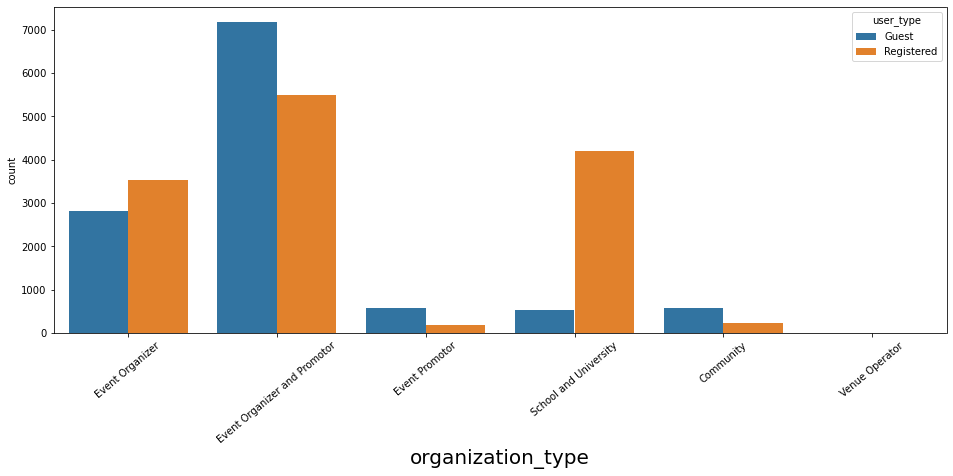

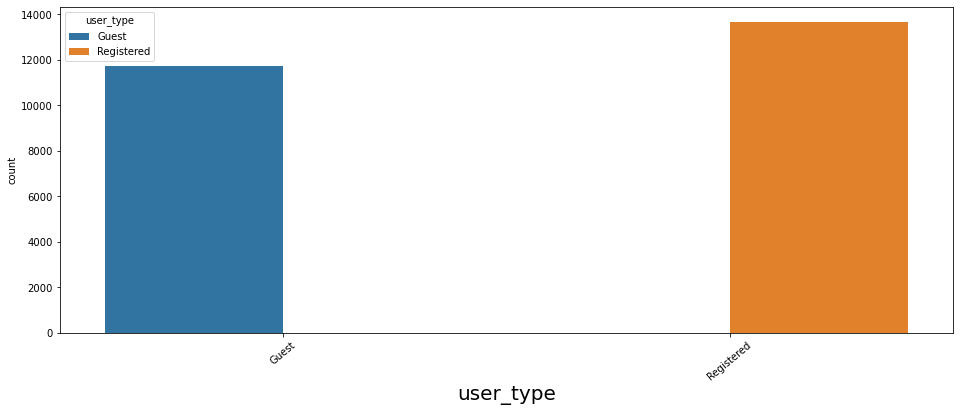

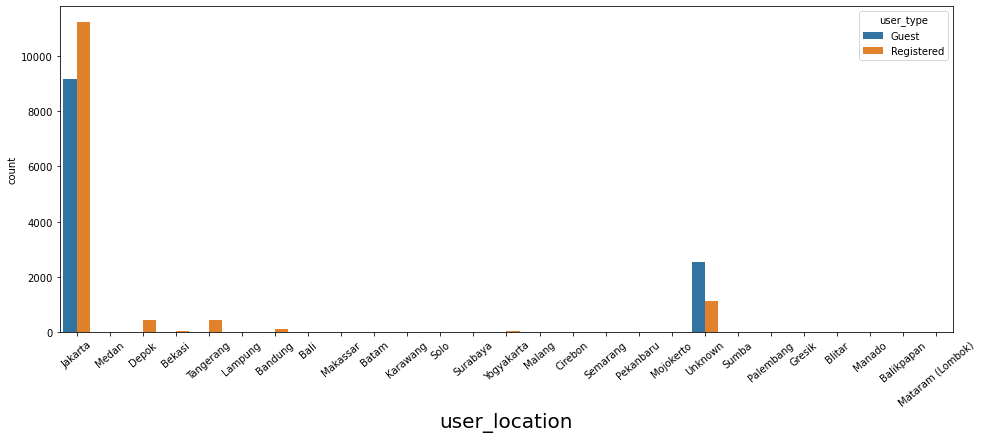

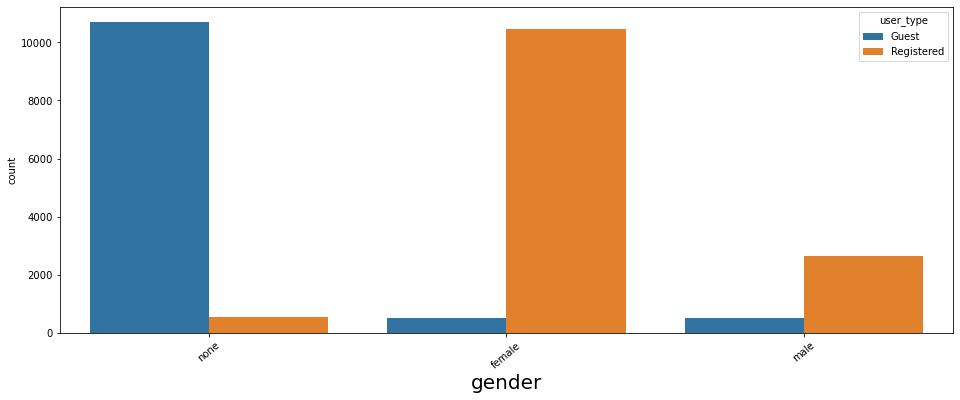

In [69]:
for i in jkt_cat:
    plt.figure(figsize = (16,6))
    ax = sns.countplot(x = i, data = jkt_cat, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=40)
    plt.tight_layout
    plt.show()

In [70]:
df['organization_type'].value_counts()

Event Organizer and Promotor    26748
Event Organizer                 19128
School and University            4734
Venue Operator                   1264
Community                        1254
Event Promotor                    888
Brand                               7
Name: organization_type, dtype: int64

In [71]:
jkt['organization_type'].value_counts()

Event Organizer and Promotor    12659
Event Organizer                  6348
School and University            4734
Community                         825
Event Promotor                    770
Venue Operator                      6
Name: organization_type, dtype: int64

### AVERAGE EVENT THAT REGISTERED PER EVENT ORGANIZERS

In [72]:
avg_evnt = df.groupby(by='organization_id', as_index=False)['event_id'].count().sort_values(by = 'event_id',ascending=False)
avg_evnt.columns = ['organization_id','frequency_of_events']

In [73]:
avg_evnt

,organization_id,frequency_of_events
34,1af57e2c0b4cd813117b114b25c36938b219e172830653...,4413
52,28471a21135fc8615295eeebb675e09f915e0b8731eb90...,4281
13,0aca88461e1849c45f8e865c5a169efcc99973717c5b04...,3689
0,00426f657147432f752353af9b2db7f19b52beefb261f6...,3157
71,39d13f95b71eb21f7b80bb1fcc3795548688fd1a8e8f27...,2069
...,...,...
108,6118011612defd4a59c68ce4d165cee78d9446883dcfcf...,1
107,6058f8f9dc8c5fc27847c0ee759f1cc18af960f62479ad...,1
215,c43151d9bc6d40045b0d596782852b660a6a0870910399...,1
100,5c95ac34644d5989a80c1258456b8624800ff519e7ba53...,1


In [74]:
avg_evnt.mean()

frequency_of_events    197.164234
dtype: float64

In [75]:
df['organization_type'].value_counts()

Event Organizer and Promotor    26748
Event Organizer                 19128
School and University            4734
Venue Operator                   1264
Community                        1254
Event Promotor                    888
Brand                               7
Name: organization_type, dtype: int64

In [76]:
eo = df[(df['organization_type'] == 'Event Organizer and Promotor') | (df['organization_type']=='Event Organizer')]

In [77]:
round(eo.groupby('organization_id')['event_id'].value_counts().mean())

60

### ONE TIME ORGANIZER VS RECCURING

In [131]:
avg_evnt[avg_evnt['frequency_of_events'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 172 to 137
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   organization_id      48 non-null     object
 1   frequency_of_events  48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [79]:
one_time = df[df['organization_id'].isin(avg_evnt[avg_evnt['frequency_of_events'] == 1]['organization_id'])]

In [80]:
len(one_time)

48

In [134]:
one_time['user_id'].value_counts()

d56dac8a2a98d1ed633733042ec18e9fdbc3a7ef0c9b9324912908e902175356    2
f2cafa8bda047f69dc717609889172165320150e838f8fc1faeb5767902f32a6    1
7a5bc54fc384b34e49c33413405bed7fc0c133d7fbb36eb7d5a54d59c62bef56    1
49019b012a05a9350571f0e70cacf021d57701e9ab1e4c8542f261c9dc5d8ee5    1
30d35b47cb9ecd54b8e4a46939b39d5499d52f92e8eed1f5073ab31967400095    1
620424bb20762de53c3c1824905cd04a8e972bc2b38eb6e0ac9ead1b69b8ddc2    1
ae7c6a97f03bc2b61a49f51e95314eaf3b63c19f7615ce8afb595ec975dc1d30    1
c21e8e89b318845ddba8c22367a6fc888814d221df0bc669a1b470d679de7e92    1
9a26f330446deb66f755bfbb7490336aa2c5fcd1874a3cf95f0969db097df0a0    1
329d9d1b03deaeff5fadd50be23adb9afe78a6d03b627cbd204d43397a6759ce    1
7ace48d15ac113bc13f69f8549f7cd3548f211fa6b4a0b37f8c29ced3847bcbb    1
a4398428d8568f6b36f7d0d1e302c9857788cb22dca5df2fc55b26bb86b60070    1
d1a9ee16e45d74a0a03bdf6d62f1b19dde77b471f37ca7161c8eee8470b05b75    1
dc9d780c40dba582eefcd7c304dfecb694bf2835d6870e2363bb5752120efce1    1
2e9a64f8766861f77409

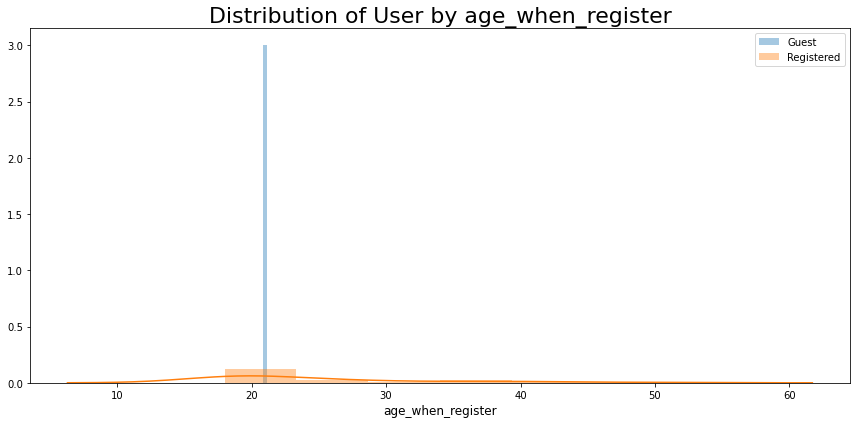

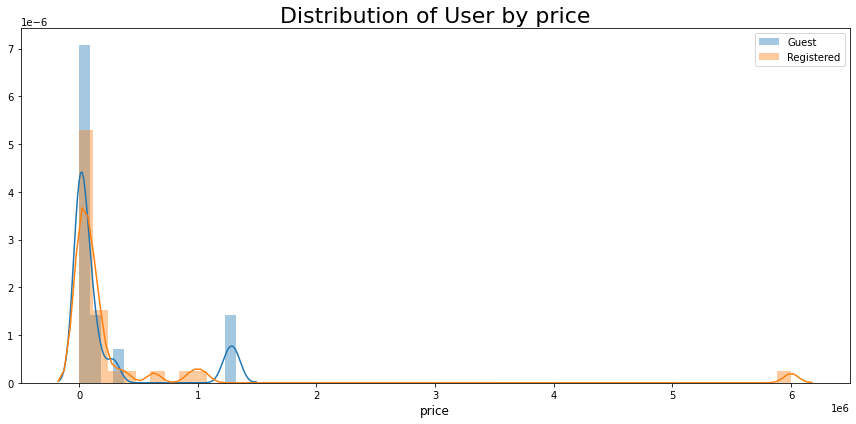

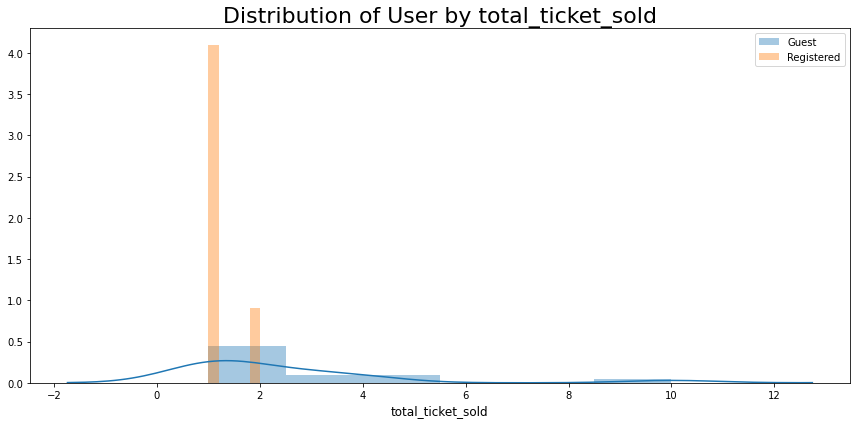

In [82]:
for i in one_time.select_dtypes(['float64', 'int64']) :
    plt.figure(figsize = (12,6))
    ax = sns.distplot(one_time[(one_time['user_type'] == 'Guest')][i])
    ax = sns.distplot(one_time[(one_time['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [83]:
one_time.groupby('user_type')['age_when_register'].value_counts()

user_type   age_when_register
Guest       21                   15
Registered  18                   10
            20                    4
            21                    2
            22                    2
            23                    2
            27                    2
            28                    2
            39                    2
            19                    1
            25                    1
            31                    1
            36                    1
            37                    1
            44                    1
            50                    1
Name: age_when_register, dtype: int64

In [84]:
one_time.groupby('user_type')['price'].value_counts()

user_type   price    
Guest       0.0           6
            20000.0       1
            35000.0       1
            50000.0       1
            80000.0       1
            99000.0       1
            150000.0      1
            288000.0      1
            1250000.0     1
            1320000.0     1
Registered  0.0          10
            100000.0      2
            120000.0      2
            150000.0      2
            175000.0      2
            11000.0       1
            25000.0       1
            50000.0       1
            53000.0       1
            55000.0       1
            58000.0       1
            65000.0       1
            85000.0       1
            105000.0      1
            279000.0      1
            385000.0      1
            632500.0      1
            950000.0      1
            1045000.0     1
            6000000.0     1
Name: price, dtype: int64

In [85]:
one_time.groupby('user_type')['total_ticket_sold'].value_counts()

user_type   total_ticket_sold
Guest       1                     7
            2                     3
            3                     2
            4                     2
            10                    1
Registered  1                    27
            2                     6
Name: total_ticket_sold, dtype: int64

In [86]:
one_time['user_type'].value_counts()

Registered    33
Guest         15
Name: user_type, dtype: int64

In [87]:
one_time['event_category'].value_counts()

Concert - Music                                                                                3
Workshop - Seminar                                                                             3
Conference - Business                                                                          2
Workshop                                                                                       2
Festival - Music                                                                               2
Seminar - Parenting                                                                            1
Seminar - Entrepreneurship                                                                     1
Music - Rock - Concert - Live Music                                                            1
Movie Screening - Talkshow - Performance - Theater - Group Activities - Education - Outdoor    1
Workshop - Seminar - Talkshow - Tech Startup - Networking                                      1
Movie Screening - Workshop - F

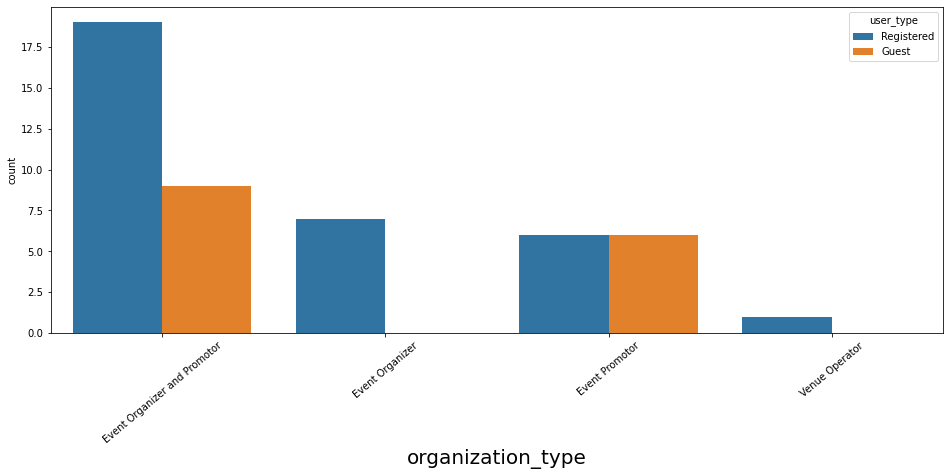

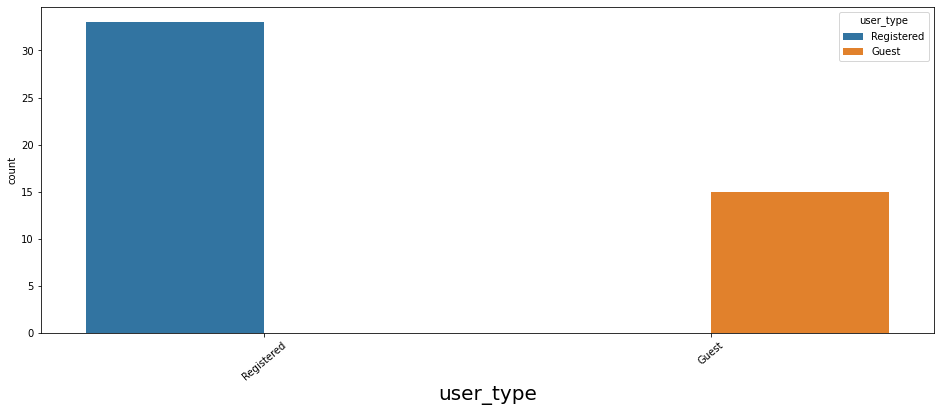

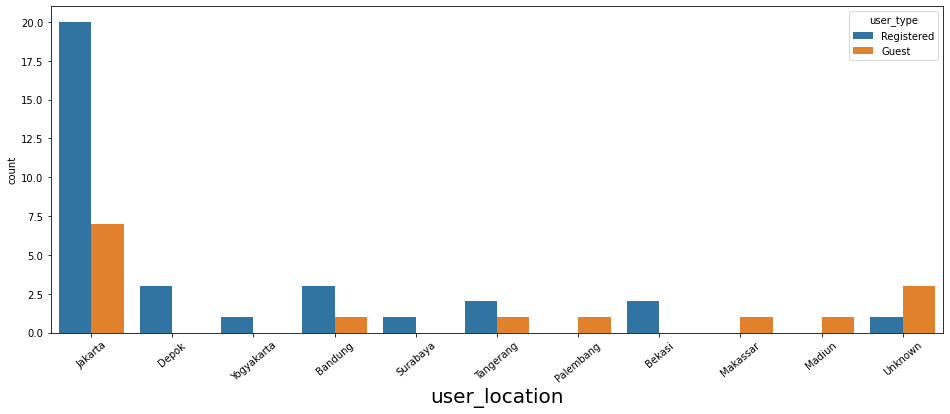

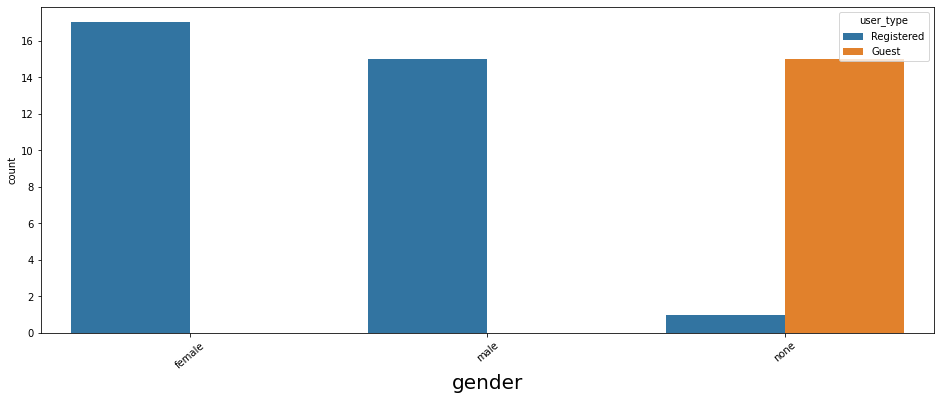

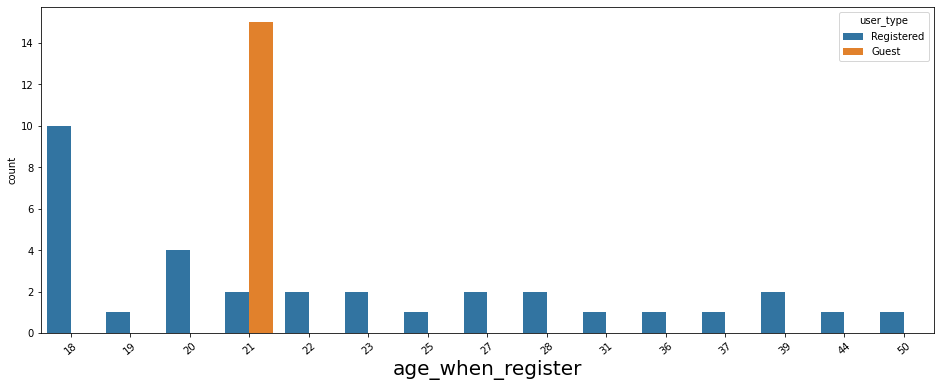

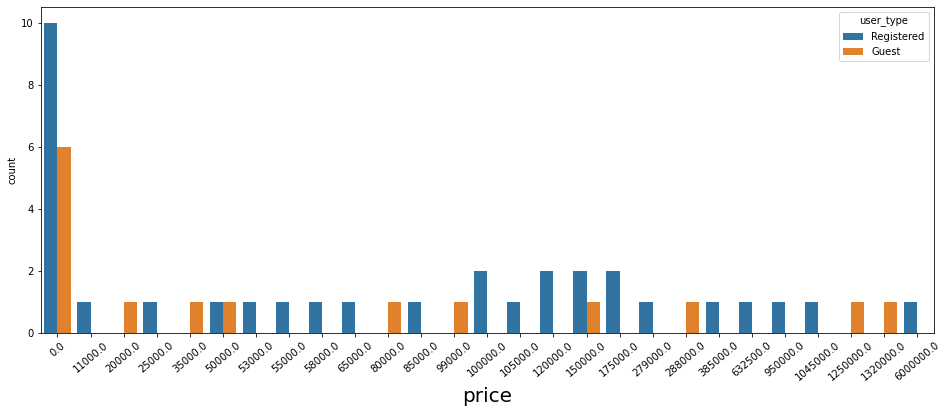

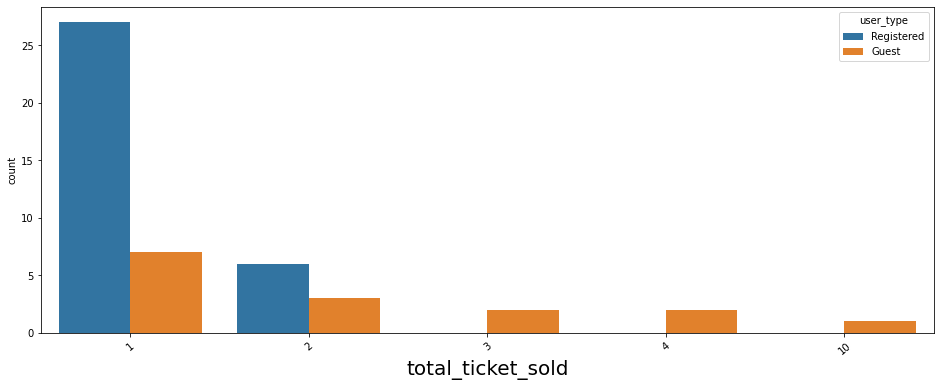

In [88]:
for i in one_time.drop(columns = ['user_id', 'event_id', 'organization_id', 'transaction_date', 'event_type', 'event_category', 'event_location']):
    plt.figure(figsize = (16,6))
    ax = sns.countplot(x = i, data = one_time, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=40)
    plt.tight_layout
    plt.show()